# Multivariate pattern classification

In [1]:
%%capture
%pip install -U neuroboros

In [22]:
import neuroboros as nb
import numpy as np
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt

In [3]:
dset = nb.Life()
sids = dset.subject_sets['attention']

In [4]:
contrasts = dset.contrasts[:20]

In [5]:
contrasts

['primate_eating',
 'primate_fighting',
 'primate_running',
 'primate_swimming',
 'ungulate_eating',
 'ungulate_fighting',
 'ungulate_running',
 'ungulate_swimming',
 'bird_eating',
 'bird_fighting',
 'bird_running',
 'bird_swimming',
 'reptile_eating',
 'reptile_fighting',
 'reptile_running',
 'reptile_swimming',
 'insect_eating',
 'insect_fighting',
 'insect_running',
 'insect_swimming']

In [25]:
maps = {}
for task in ['tax', 'beh']:
    for sid in sids:
        cc = []
        for run_ in [1, 2, 3, 4, 5]:
            c = [dset.load_contrasts(sid, task, run_, lr, kind='t')[:20]
                 for lr in 'lr']
            c = np.concatenate(c, axis=1)
            cc.append(c)
        maps[task, sid] = np.nanmean(cc, axis=0)

/var/folders/7k/tr89hggn2z5207_hn18ttpk80000gn/T/ipykernel_42908/332181352.py:10: RuntimeWarning: Mean of empty slice
  maps[task, sid] = np.nanmean(cc, axis=0)


In [35]:
sid = sids[0]
vmax = 5

In [36]:
t0 = nb.plot(maps['tax', sid][0], cmap='bwr', vmax=vmax, vmin=-vmax)

In [37]:
t1 = nb.plot(maps['tax', sid][1], cmap='bwr', vmax=vmax, vmin=-vmax)

In [38]:
b0 = nb.plot(maps['beh', sid][0], cmap='bwr', vmax=vmax, vmin=-vmax)

In [39]:
b1 = nb.plot(maps['beh', sid][1], cmap='bwr', vmax=vmax, vmin=-vmax)

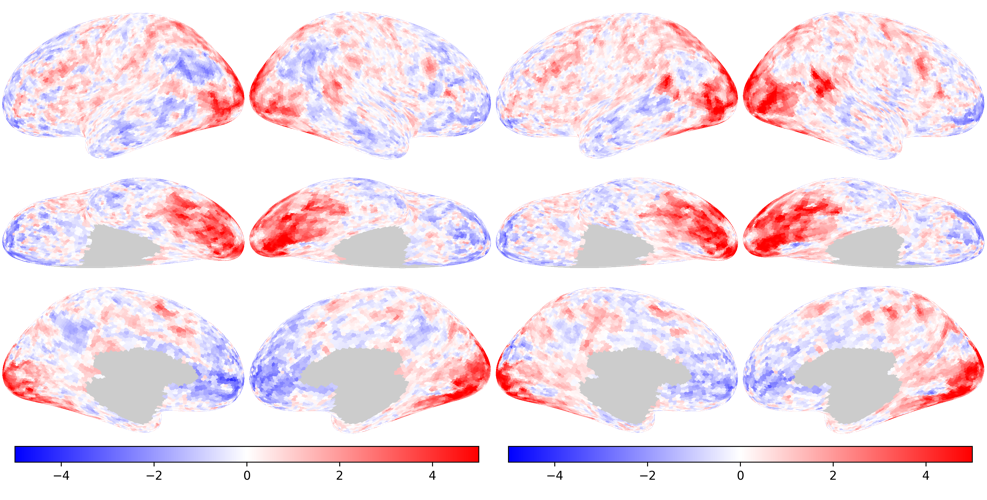

In [49]:
nb.Image.hstack([t0, t1])

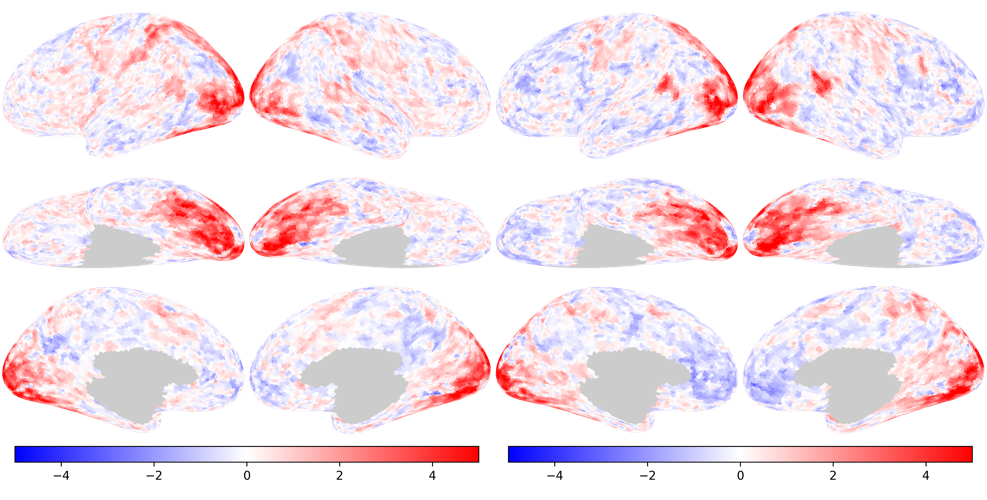

In [50]:
nb.Image.hstack([b0, b1])

In [47]:
d = cdist(maps['tax', sid], maps['beh', sid], 'correlation')

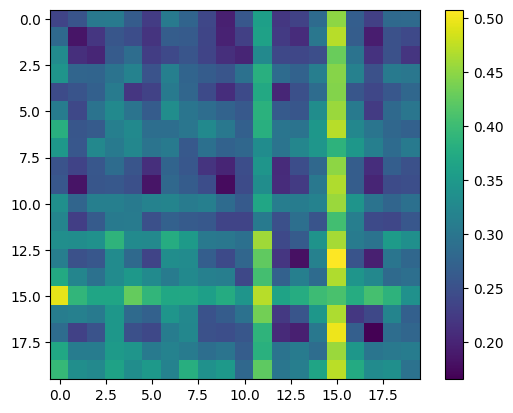

In [51]:
plt.imshow(d)
plt.colorbar()
plt.show()

In [52]:
np.argmin(d, axis=0)

array([ 0,  9,  2,  1,  4,  9,  2,  2,  8,  9,  2, 11,  4, 13,  2,  7, 16,
       17, 11,  2])

In [58]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [55]:
ns = len(sids)
ns

12

In [56]:
accs = np.zeros((ns, ns))
for i, s1 in enumerate(sids):
    for j, s2 in enumerate(sids):
        d = cdist(maps['tax', s1], maps['beh', s2], 'correlation')
        accs[i, j] = np.mean(np.argmin(d, axis=0) == np.arange(20))

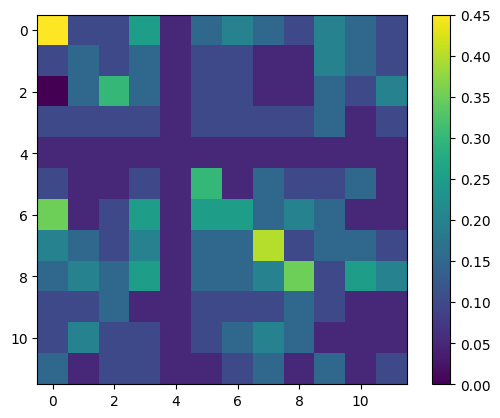

In [57]:
plt.imshow(accs)
plt.colorbar()
plt.show()